# Band structure of honeycomb lattice

In [1]:
import sys
root_folder = '../src'
sys.path.insert(1, root_folder) # insert at 1, 0 is the script path (or '' in REPL)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from params import Params

In [19]:
def R(x,y,x_tab):  
    r = np.linalg.norm(np.subtract(x_tab,np.array([x,y])),axis=1)
    r_min = np.min(r)
   
    p = 8.0
    d = 0.5
    y = -p*m.exp(-r_min**2/d**2)

    return y

def honeycomb_supercell(params): 
    x_tab = params.b*np.array([[0, 0],[0.5, 0.5*m.sqrt(3)], [1.5, 0.5*m.sqrt(3)],[2, 0]])

    for ii in range(params.Nx-1):
        x_shift = np.add(x_tab[0:4], (ii+1)*(params.a1+params.a2))
        x_tab = np.vstack((x_tab, x_shift))
        
    return x_tab

def honeycomb_2d(params): 
    x_tab = honeycomb_supercell(params)
    
    for ii in range(params.Ny-1):
        x_shift = np.add(x_tab[0:4*params.Nx], (ii+1)*(params.a1-params.a2))
        x_tab = np.vstack((x_tab, x_shift))

    return x_tab 

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 3, Ny = 1
Number of grids: nx = 450, ny = 90
periodicity: a = 1, side length = 0.5773502691896258
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Reciprocal lattice vectors: g1 = [0.5       0.8660254], g2 = [-0.5        0.8660254]



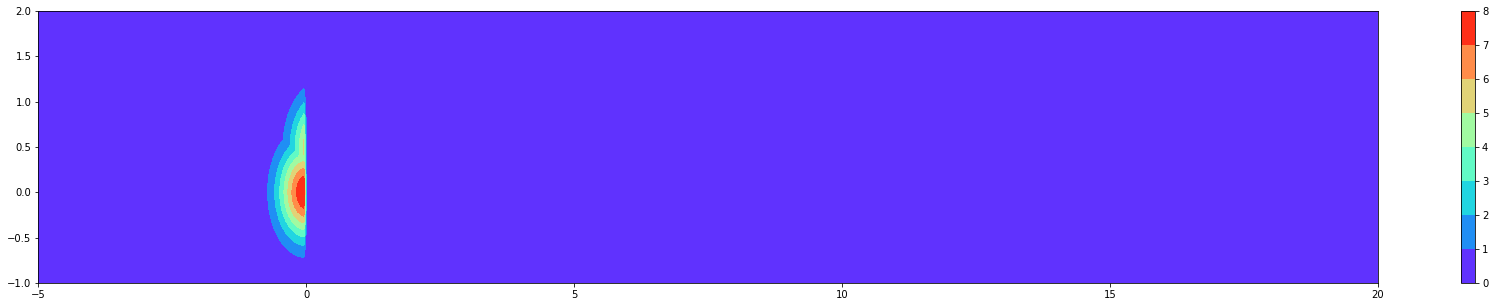

In [20]:
params = Params(Nx = 3)
print(params)

x_tab = honeycomb_supercell(params)

x_ = np.linspace(-5,20, params.nx)
y_ = np.linspace(-1,2, params.ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([params.nx,params.ny])

for ii in range(params.ny):
    for jj in range(params.ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 9, Ny = 4
Number of grids: nx = 450, ny = 150
periodicity: a = 1, side length = 0.5773502691896258
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Reciprocal lattice vectors: g1 = [0.5       0.8660254], g2 = [-0.5        0.8660254]



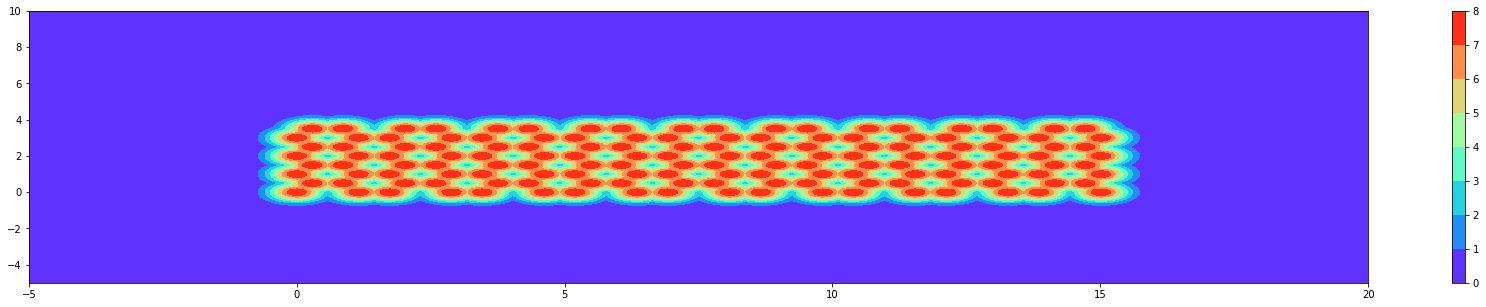

In [21]:
params = Params(nx = 450, ny = 150, Ny=4)
print(params)

x_tab = honeycomb_2d(params)

x_ = np.linspace(-5,20, params.nx)
y_ = np.linspace(-5,10, params.ny) 
X,Y = np.meshgrid(x_, y_,indexing='ij')

Z = np.empty([params.nx,params.ny])

for ii in range(params.nx):
    for jj in range(params.ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()